In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
titanic_data=pd.read_csv("/content/tested.csv")

In [9]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#imputing the missing values for Age,Fare and Embarked
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
titanic_data["Age"] = imputer.fit_transform(titanic_data[["Age"]])

imputer = SimpleImputer(strategy="mean")
titanic_data["Fare"] = imputer.fit_transform(titanic_data[["Fare"]])

In [12]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data = pd.get_dummies(titanic_data, columns=["Embarked"])
titanic_data['Embarked_C'] = label_encoder.fit_transform(titanic_data['Embarked_C'])
titanic_data['Embarked_Q'] = label_encoder.fit_transform(titanic_data['Embarked_Q'])
titanic_data['Embarked_S'] = label_encoder.fit_transform(titanic_data['Embarked_S'])

In [14]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,34.50000,0,0,7.8292,0,1,0
1,1,3,0,47.00000,1,0,7.0000,0,0,1
2,0,2,1,62.00000,0,0,9.6875,0,1,0
3,0,3,1,27.00000,0,0,8.6625,0,0,1
4,1,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,0,0,1
414,1,1,0,39.00000,0,0,108.9000,1,0,0
415,0,3,1,38.50000,0,0,7.2500,0,0,1
416,0,3,1,30.27259,0,0,8.0500,0,0,1


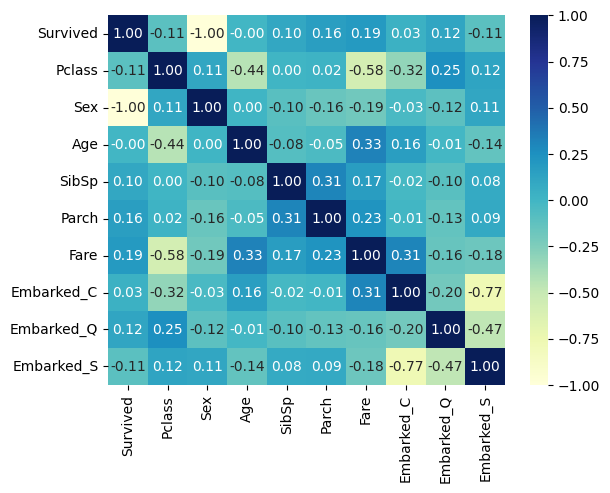

In [15]:
#displaying correlation map to see the correlation between columns of dataset
numeric_data = titanic_data.select_dtypes(include=[int, float])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

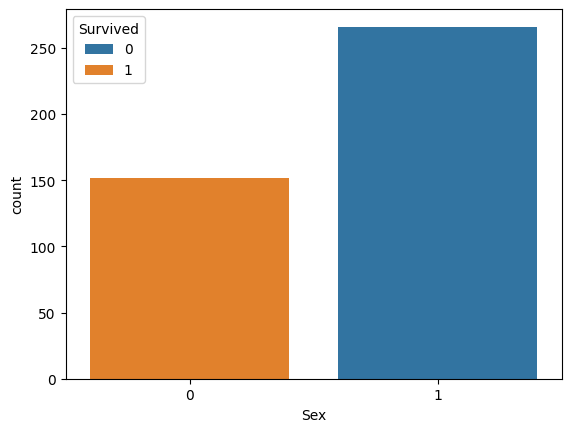

In [16]:
#Using bar graph to see the survived males and females
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])

In [17]:
#splitting the dataset into 70-30 ratio for training and testing
from sklearn.model_selection import train_test_split

X = titanic_data.drop('Survived', axis=1) #Selecting the features
y = titanic_data['Survived'] #Selecting the prediction target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
#Selecting the regressor and training the model
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [19]:
#prediction of survival using test data
y_predict = model.predict(X_test)
print(y_predict)

[0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0.]


In [20]:
#Checking model's perfomance over test data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
accuracy

1.0